# Project: Wrangling and Analyze Data

## Import Libraries 
In the cell below, we import **all** the libraries required for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv') # Direct download of the WeRateDogs Twitter archive data, and store inside a pandas dataframe

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_response = requests.get(url, allow_redirects = True)

with open('image-predictions.tsv', mode='wb') as file:
  file.write(image_predictions_response.content)

image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Since my Twitter Developer account approval is pending, 
# I will be reading the data directly from the tweet-json.json file
tweet_data = pd.read_json('tweet-json.json', lines=True)
tweet_data = tweet_data.filter(['id', 'favorite_count', 'retweet_count'])
tweet_data = tweet_data.rename(columns={"id":"tweet_id"})
tweet_data.to_csv('tweet_data.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### i. Accessing the twitter archive data

In [6]:
twitter_archive_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [7]:
# # Number of retweeted tweets
# len(twitter_archive_df[twitter_archive_df['retweeted_status_id'].notnull()])

In [8]:
twitter_archive_df.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
163   860276583193509888                    NaN                  NaN   
786   774757898236878852                    NaN                  NaN   
971   750101899009982464                    NaN                  NaN   
341   832215726631055365                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
1523  690607260360429569           6.903413e+17          467036706.0   
148   863427515083354112           8.634256e+17           77596200.0   
1768  678389028614488064                    NaN                  NaN   
1215  715009755312439296                    NaN                  NaN   
864   762464539388485633                    NaN                  NaN   

                      timestamp  \
163   2017-05-04 23:34:55 +0000   
786   2016-09-10 23:54:11 +0000   
971   2016-07-04 23:00:03 +0000   
341   2017-02-16 13:11:05 +0000   
8     2017-07-27 16:25:51 +0000   
1523  2016-01-22 18:49:36 +0000   
148   2017-05-13 16:15:35 +0000   
1768  2015-12-20 01:38:42 +0000   
1215  2016-03-30 02:56:24 +0000   
864   2016-08-08 01:44:46 +0000   

                                                 source  \
163   <a href="http://twitter.com/download/iphone" r...   
786   <a href="http://twitter.com/download/iphone" r...   
971   <a href="http://twitter.com/download/iphone" r...   
341   <a href="http://twitter.com/download/iphone" r...   
8     <a href="http://twitter.com/download/iphone" r...   
1523  <a href="http://twitter.com/download/iphone" r...   
148   <a href="http://twitter.com/download/iphone" r...   
1768  <a href="http://twitter.com/download/iphone" r...   
1215  <a href="http://twitter.com/download/iphone" r...   
864   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
163   This is Jordy. He likes to go on adventures an...                  NaN   
786   This is Finley. She's a Beneboop Cumbersplash....                  NaN   
971   Meet Lilah. She agreed on one quick pic. Now s...                  NaN   
341   RT @dog_rates: This is Moreton. He's the Good ...         7.932865e+17   
8     This is Zoey. She doesn't want to be one of th...                  NaN   
1523                              12/10 @LightningHoltt                  NaN   
148   @Jack_Septic_Eye I'd need a few more pics to p...                  NaN   
1768  This is Bella. She just learned that her final...                  NaN   
1215  This is Siba. She's remarkably mobile. Very sl...                  NaN   
864   This is Buddy. His father was a bear and his m...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
163                        NaN                        NaN   
786                        NaN                        NaN   
971                        NaN                        NaN   
341               4.196984e+09  2016-11-01 03:00:09 +0000   
8                          NaN                        NaN   
1523                       NaN                        NaN   
148                        NaN                        NaN   
1768                       NaN                        NaN   
1215                       NaN                        NaN   
864                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
163   https://twitter.com/dog_rates/status/860276583...                12   
786   https://twitter.com/dog_rates/status/774757898...                12   
971   https://twitter.com/dog_rates/status/750101899...                11   
341   https://twitter.com/dog_rates/status/793286476...                13   
8     https://twitter.com/dog_rates/status/890609185...                13   
1523                                                NaN                12   
148                                                 NaN                12   
1768  https://twit

In [9]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
twitter_archive_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [11]:
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
# Showing rows with numerators less than 10
twitter_archive_df[twitter_archive_df.rating_numerator < 10].count()[0]

440

In [13]:
# Showing rows with denominators equals 0
twitter_archive_df[(twitter_archive_df.rating_denominator == 0) ]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [14]:
# Showing rows with denominators greater or less than 10
print(len(twitter_archive_df[(twitter_archive_df.rating_denominator < 10) | (twitter_archive_df.rating_denominator > 10)]))
twitter_archive_df[(twitter_archive_df.rating_denominator < 10) | (twitter_archive_df.rating_denominator > 10)]

23


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

### ii. Accessing the tweet image prediction 

In [15]:
image_predictions_df.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [16]:
image_predictions_df.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [17]:
image_predictions_df.sample(10)

tweet_id                                          jpg_url  \
1745  822975315408461824  https://pbs.twimg.com/media/C2vLrpvWIAA3LM3.jpg   
1997  875021211251597312  https://pbs.twimg.com/media/DCSzF3NVoAAPzT4.jpg   
711   685315239903100929  https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg   
518   676470639084101634  https://pbs.twimg.com/media/CWNOdIpWoAAWid2.jpg   
236   670428280563085312  https://pbs.twimg.com/media/CU3W9ELWEAEdUA0.jpg   
79    667453023279554560  https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg   
487   675501075957489664  https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg   
368   672968025906282496  https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg   
260   670783437142401025  https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg   
1546  792394556390137856  https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg   

      img_num                           p1   p1_conf  p1_dog  \
1745        1                      bathtub  0.331098   False   
1997        2  West_Highland_white_terrier  0.714319    True   
711         2                         chow  0.470162    True   
518         1             golden_retriever  0.790386    True   
236         1                         chow  0.335269    True   
79          1           Labrador_retriever  0.825670    True   
487         1                        dough  0.806757   False   
368         1                   toy_poodle  0.678046    True   
260         1                     lacewing  0.381955   False   
1546        2               cocker_spaniel  0.746387    True   

                     p2   p2_conf  p2_dog                         p3  \
1745                tub  0.248860   False                   Pembroke   
1997     Siberian_husky  0.091913    True             Great_Pyrenees   
711          Pomeranian  0.159677    True                 Eskimo_dog   
518              borzoi  0.022885    True                      dingo   
236    golden_retriever  0.305850    True            Tibetan_mastiff   
79       French_bulldog  0.056639    True  Staffordshire_bullterrier   
487              bakery  0.027907   False                French_loaf   
368    miniature_poodle  0.160273    True                   Airedale   
260   sulphur_butterfly  0.106810   False                 leafhopper   
1546       Irish_setter  0.091615    True           miniature_poodle   

       p3_conf  p3_dog  
1745  0.233162    True  
1997  0.046038    True  
711   0.105074    True  
518   0.015343   False  
236   0.063325    True  
79    0.054018    True  
487   0.018189   False  
368   0.065649    True  
260   0.068347   False  
1546  0.061078    True

In [18]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions_df.loc[]

SyntaxError: invalid syntax (2069777604.py, line 1)

In [20]:
# I'm merely interested as to why this image was classified as a paper towel.
image_predictions_df.loc[2071, 'jpg_url']

'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg'

In [21]:
from IPython.display import Image
Image(url="https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg")

### iii. Getting the tweet data from twitter API

In [22]:
tweet_data.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

In [23]:
tweet_data.sample(10)

tweet_id  favorite_count  retweet_count
1158  724004602748780546            4561           1790
1907  674422304705744896            1536            592
1381  700847567345688576            2637            558
1854  675522403582218240            1122            316
292   837820167694528512           37277           8952
2255  667728196545200128             398            162
1467  694183373896572928            3236           1040
2314  666649482315059201             923            608
79    877316821321428993           27907           5414
1506  691483041324204033            2608            656

In [24]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. Inaccurate tweet id (integer instead of string).

2. Invalid timestamp data type (String not DateTime)

3. The Twitter enhanced archive data contains 181 retweets.

4. There are 78 reply to tweet in the Twitter enhanced archive data

5. Incorrect dog names like None, a, an, & the.

6. Predicted photo data are not all complete (2075 instead of 2356)

7. Instead of using spaces, the picture names uses underscore in p1, p2 and p3 column.

8. Inconsistent title case for p name

### Tidiness issues
1. There are four columns of data for the dog stage

2. Despite being split into three different dataframes, all the data are related.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive_df.copy()
clean_tweet_data = tweet_data.copy()
clean_image_predictions = image_predictions_df.copy()

In [26]:
clean_twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [27]:
clean_tweet_data.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           39467           8853
1  892177421306343426           33819           6514
2  891815181378084864           25461           4328
3  891689557279858688           42908           8964
4  891327558926688256           41048           9774

In [28]:
clean_image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [29]:
# Create a new dog_stage column by extracting dog stage from the text column.
clean_twitter_archive['dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')

## Tidiness Issues

### **Issue #1:** There are four columns of data for the dog stage.

#### **Define:** The dog stage should be extracted from the text and merged into one colum (dog_stage), finally the four other colums should be dropped.

#### Code

In [30]:
# Create a new dog_stage column by extracting dog stage from the text column.
clean_twitter_archive['dog_stage'] = clean_twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_twitter_archive = clean_twitter_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [31]:
clean_twitter_archive.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
81    877201837425926144                    NaN                  NaN   
40    884562892145688576                    NaN                  NaN   
196   854732716440526848                    NaN                  NaN   
1632  684460069371654144                    NaN                  NaN   
2017  672160042234327040                    NaN                  NaN   
1442  696754882863349760                    NaN                  NaN   
688   787810552592695296                    NaN                  NaN   
506   812747805718642688                    NaN                  NaN   
868   761750502866649088                    NaN                  NaN   
2093  670780561024270336                    NaN                  NaN   

                      timestamp  \
81    2017-06-20 16:29:50 +0000   
40    2017-07-11 00:00:02 +0000   
196   2017-04-19 16:25:34 +0000   
1632  2016-01-05 19:42:51 +0000   
2017  2015-12-02 21:06:56 +0000   
1442  2016-02-08 17:58:03 +0000   
688   2016-10-17 00:20:47 +0000   
506   2016-12-24 19:52:31 +0000   
868   2016-08-06 02:27:27 +0000   
2093  2015-11-29 01:45:22 +0000   

                                                 source  \
81    <a href="http://twitter.com/download/iphone" r...   
40    <a href="http://twitter.com/download/iphone" r...   
196   <a href="http://twitter.com/download/iphone" r...   
1632  <a href="http://twitter.com/download/iphone" r...   
2017  <a href="http://twitter.com/download/iphone" r...   
1442  <a href="http://twitter.com/download/iphone" r...   
688   <a href="http://twitter.com/download/iphone" r...   
506   <a href="http://twitter.com/download/iphone" r...   
868   <a href="http://twitter.com/download/iphone" r...   
2093  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
81    This is Nelly. He graduated with his dogtorate...                  NaN   
40    This is Kevin. He's just so happy. 13/10 what ...                  NaN   
196   This is Marlee. She fetched a flower and immed...                  NaN   
1632  This is Jeph. He's a Western Sagittarius Dookm...                  NaN   
2017  This is Bubba. He's a Titted Peebles Aorta. Ev...                  NaN   
1442  This is Reptar. He specifically asked for his ...                  NaN   
688   This is Frank. He wears sunglasses and walks h...                  NaN   
506   RT @dog_rates: Meet Sammy. At first I was like...         6.800555e+17   
868   RT @dog_rates: "Tristan do not speak to me wit...         6.853251e+17   
2093  This is Traviss. He has no ears. Two rare dogs...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
81                         NaN                        NaN   
40                         NaN                        NaN   
196                        NaN                        NaN   
1632                       NaN                        NaN   
2017                       NaN                        NaN   
1442                       NaN                        NaN   
688                        NaN                        NaN   
506               4.196984e+09  2015-12-24 16:00:30 +0000   
868               4.196984e+09  2016-01-08 05:00:14 +0000   
2093                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
81    https://twitter.com/dog_rates/status/877201837...                12   
40    https://twitter.com/dog_rates/status/884562892...                13   
196   https://twitter.com/dog_rates/status/854732716...                12   
1632  https://twitter.com/dog_rates/status/684460069...                10   
2017  https://twitter.com/dog_rates/status/672160042...                 8   
1442  https://twitter.com/dog_rates/status/696754882...                10   
688   https://twitter.com/dog_rates/status/787810552...                11   
506   https://twit

### **Issue #2:** Despite being split into three different dataframes, all the data are related.

#### **Define:** All dataframes should be combined and joined together using the tweet id.

#### Code

In [32]:
# Combining the Enhanced Twitter Archive data that has been cleaned with the Tweet Data from the Twitter API
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet_data, on='tweet_id', how='left')

# Taking the resulting merged archive and merging it with the Tweet Image Predictions
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_image_predictions, on='tweet_id', how='left')

#### Test

In [33]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

## Quality Issues

### **Issue #1:** Inaccurate tweet id (integer instead of string).

#### **Define:** Convert the tweet id column's data type from an integer to a string using astype.

#### Code

In [34]:
# Converting the tweet_id from integer into string
clean_twitter_archive.tweet_id = clean_twitter_archive.tweet_id.astype('str')

#### Test

In [35]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### **Issue #2:** Invalid timestamp data type (String not DateTime).

#### **Define:** Convert the timestamp column's data type from an string to a DateTime.

#### Code

In [36]:
# Converting the tweet_id from integer into string
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)

#### Test

In [37]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### **Issue #3:** The Twitter enhanced archive data contains 181 retweets.

#### **Define:** Remove all associated columns and the rows that indicate retweets.

#### Code

In [38]:
# Only keep original tweets that do not have a retweet statud id.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [39]:
# Drop all retweet related columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [40]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              364 non-null    object             
 11  favorite_count         2175 non-null   float64          

### **Issue #4:** There are 78 reply to tweet in the Twitter enhanced archive data.

#### **Define:** Remove all associated columns and the rows that indicate tweet replies.

#### Code

In [41]:
# Only keep original tweets that do not have a retweet statud id.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2097 non-null   object             
 1   in_reply_to_status_id  0 non-null      float64            
 2   in_reply_to_user_id    0 non-null      float64            
 3   timestamp              2097 non-null   datetime64[ns, UTC]
 4   source                 2097 non-null   object             
 5   text                   2097 non-null   object             
 6   expanded_urls          2094 non-null   object             
 7   rating_numerator       2097 non-null   int64              
 8   rating_denominator     2097 non-null   int64              
 9   name                   2097 non-null   object             
 10  dog_stage              353 non-null    object             
 11  favorite_count         2097 non-null   float64          

In [42]:
# Drop all retweet related columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [43]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           353 non-null    object             
 9   favorite_count      2097 non-null   float64            
 10  retweet_count       2097 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### **Issue #5:** Incorrect dog names like None, a, an, & the.

#### **Define:** Extract the correct names from the text column and change any invalid names (None or names beginning with lowercase letters) to NaN. (immediately following the word "named").

#### Code

In [44]:
clean_twitter_archive.name = clean_twitter_archive.name.replace(regex=['^[a-z]+', 'None'], value= np.nan)

In [45]:
# a function to extract names from text columns, returning NaN if there are no words that can be called names.
def name_extractor(text):
  list_of_text = text.split()
  for word in list_of_text:
    if word.lower() == 'named':
      name_index = list_of_text.index(word) + 1 # word after 'named
      return list_of_text[name_index]
    else:
      pass
  return np.nan

In [46]:
#np.where(condition, what to do if condition is true, what to do if condition is false)
clean_twitter_archive.name = np.where(clean_twitter_archive.name.isnull(), clean_twitter_archive.text.apply(name_extractor), clean_twitter_archive.name)

#### Test

In [47]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1413 non-null   object             
 8   dog_stage           353 non-null    object             
 9   favorite_count      2097 non-null   float64            
 10  retweet_count       2097 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### **Issue #6:** Predicted photo data are not all complete (2075 instead of 2356).

#### **Define:** Remove the row with missing photo data.

#### Code

In [48]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.jpg_url.notnull()]

#### Test

In [49]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1372 non-null   object             
 8   dog_stage           322 non-null    object             
 9   favorite_count      1971 non-null   float64            
 10  retweet_count       1971 non-null   float64            
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### **Issue #7:** Instead of using spaces, the picture names uses underscore in p1, p2 and p3 column.

#### **Define:** Replace the underscore with space.

#### Code

In [50]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.replace('_', ' ')
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.replace('_', ' ')
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.replace('_', ' ')

#### Test

In [51]:
clean_twitter_archive.p1.sample(10)

430     Old English sheepdog
1387              bath towel
1182        golden retriever
1372        golden retriever
2005                     pug
1272      Labrador retriever
2316           Border collie
917         golden retriever
853         golden retriever
823              Boston bull
Name: p1, dtype: object

In [52]:
clean_twitter_archive.p2.sample(10)

2090                    Pembroke
1047                         tub
299              shopping basket
1407    Chesapeake Bay retriever
2101                home theater
2288            Lakeland terrier
2121                 tennis ball
89                Siberian husky
1263            miniature poodle
1002                     Samoyed
Name: p2, dtype: object

In [53]:
clean_twitter_archive.p3.sample(10)

2264    Australian terrier
2322                 dingo
89          Great Pyrenees
2232    Labrador retriever
2066         silky terrier
1468           Maltese dog
1433                   pug
1328                  chow
1004     Shetland sheepdog
321     Labrador retriever
Name: p3, dtype: object

### **Issue #8:** Inconsistent title case for p name.

#### **Define:** Replace the  names that starts with lowercase using an uppercase.

#### Code

In [54]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

#### Test

In [55]:
clean_twitter_archive.p1.sample(10)

2315       German Shepherd
1724                Pillow
1734        French Bulldog
1478          Dining Table
557               Bookcase
917       Golden Retriever
167     Labrador Retriever
1936                   Pug
1643              Bluetick
248         Dandie Dinmont
Name: p1, dtype: object

In [56]:
clean_twitter_archive.p2.sample(10)

1600               Redbone
1358       Standard Poodle
2015                 Crate
2203                   Pug
119               Cardigan
919                Volcano
2258               Bighorn
641       Lakeland Terrier
947     Labrador Retriever
726        Tibetan Mastiff
Name: p2, dtype: object

In [57]:
clean_twitter_archive.p3.sample(10)

1815           Miniature Pinscher
1707    Staffordshire Bullterrier
134        Curly-Coated Retriever
493            Labrador Retriever
1691               Siberian Husky
821                       Whippet
1183                Toilet Tissue
1197                     Malamute
906          Bernese Mountain Dog
2282                       Kuvasz
Name: p3, dtype: object

In [58]:
(clean_twitter_archive.p1.str.istitle()).value_counts()

True    1971
Name: p1, dtype: int64

In [59]:
(clean_twitter_archive.p2.str.istitle()).value_counts()

True    1971
Name: p2, dtype: int64

In [60]:
(clean_twitter_archive.p3.str.istitle()).value_counts()

True    1971
Name: p3, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
clean_twitter_archive.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
The data set is analysed in this section, along with the related visuals that help us reach insightful conclusions.

### Insights:
1. Displaying the general quantity of tweets over time allowing us to spot any noticeable changes in the volume of tweets.

2. The popularity of different dog stages in percentage.

3. Relationship between the number of retweets and the number of favorites.

### Visualization
1. Number of tweet as date changes

In [62]:
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = clean_twitter_archive.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

/var/folders/8f/70804ky96tl5nvmk8nyl0f4w0000gn/T/ipykernel_13575/3297307203.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    1971
dtype: int64

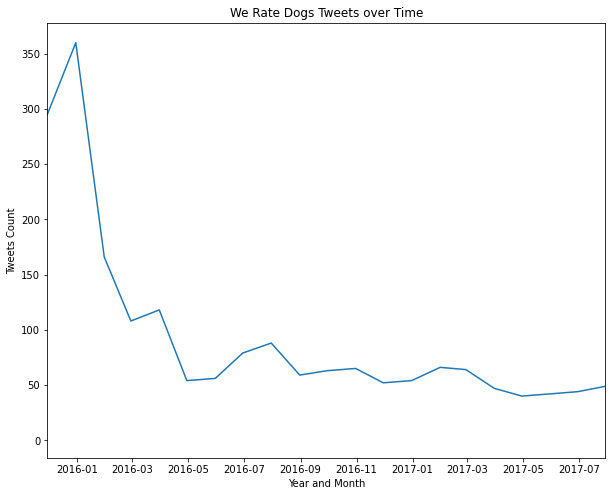

In [63]:
plt.figure(figsize=(10, 8));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

Over time, the number of tweets drastically reduced, peaking in January and March of 2016 before steadily declining thereafter.

2. Percentage of dog stages

In [64]:
dog_stage_df = clean_twitter_archive.dog_stage.value_counts()
dog_stage_df

pupper     220
doggo       71
puppo       28
floofer      3
Name: dog_stage, dtype: int64

(-1.1836868322288165, 1.418136185775833, -1.333841557178941, 1.205571582077769)

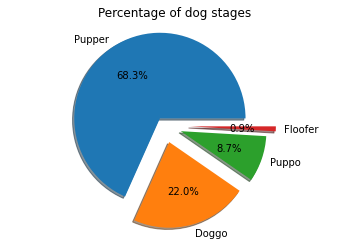

In [65]:
# Creating a pie chart
plt.pie(dog_stage_df,
        labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'], 
        autopct='%1.1f%%',
        shadow=True,
        explode=(0.1, 0.2, 0.2, 0.3)
        )

plt.title('Percentage of dog stages')
plt.axis('equal')

3. Relationship between the number of retweets and the number of favorites


Text(0, 0.5, 'Number of Favorites')

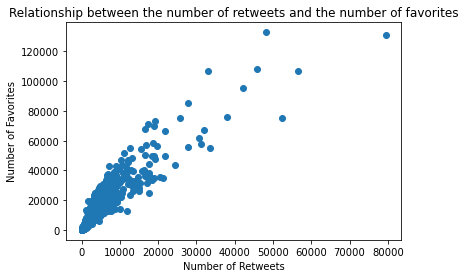

In [66]:
plt.scatter(clean_twitter_archive.retweet_count, clean_twitter_archive.favorite_count)
plt.title('Relationship between the number of retweets and the number of favorites')
plt.xlabel('Number of Retweets')
plt.ylabel ('Number of Favorites')